<font color='#54555A' size='5'>**Having visibility on CO2 emissions related to industrial activities** </font>

<font color='#6BA9DA' size='3'>1 - Data Science Objective</font>

Forecasting CO2 Emissions for the 23 target refinerees

# Importaions

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install xlrd

In [56]:
import pandas as pd
import numpy as np
from numpy import isnan
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br><br><font color='#6BA9DA' size='6'>Step 1 - Data Understanding:</font>

## Dataset 1 :  OdysseyFactories 

In [16]:
# Target factories data
file_path = r'C:\Users\HP\Downloads\OdysseyFactories.csv'

In [25]:
test = pd.read_csv(file_path)

In [27]:
test

,REGISTRY_CODE,IDENTIFIER_IN_REG,ADD ADRESS,Latitude,Longitude,INSTALLATION_NAME,INSTALLATION_IDENTIFIER,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,DE,55 - Anlagenkonto,Bahnhofstraße 82,"52.4166848,",10.17579,AVISTA OIL Deutschland GmbH,37,21665,24204,28481,...,33622,33548,33270,34415,38883,42238,43711,42213,41130,42690
1,DE,24 - Anlagenkonto,Industriegebiet Süd,53.9049178,9.0771825,Destillation und Nebenanlagen Brunsbüttel,6,35828,35155,36387,...,33842,36083,34156,35842,35823,34804,30894,25625,32134,32399
2,DE,LSFO-Anlage HES Wilhelmshaven,Raffineriestraße 1,53.6082551,8.0856066,LSFO-Anlage HES Wilhelmshaven,212260,40750,40603,62235,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,DE,38 - Anlagenkonto,Maienweg 1,51.28189,11.9835991,Mineralölraffinerie Leuna,20,1692681,1909041,1600337,...,1788324,2066947,2044487,1873500,2119072,1973301,1976029,2014908,2088240,1852251
4,DE,23 - Anlagenkonto,Haiminger Straße 1,48.1974495,12.8373849,Mineralölverarbeitung Burghausen,5,1071986,960452,1108174,...,1106000,1098161,1107526,975544,1088405,1085791,1101629,1116789,1108379,1154282
5,DE,37 - Anlagenkonto,Passower Chaussee 111,53.0932757,14.2287038,PCK Raffinerie Glocke Schwedt,19,3123277,3600518,3480163,...,3842978,3766493,4015772,3714705,3601523,1520052,1583685,1501147,1642259,1548738
6,DE,21 - Anlagenkonto,Ruhr Oel GmbH,51.59769,"7.0228862,866",RUHR OEL GmbH - Werk Horst - CO2-Glocke,3,899437,1105424,1016652,...,1116050,1120628,1162480,1173920,1190795,989751,1096475,1107916,1067408,1091147
7,DE,22 - Anlagenkonto,Ruhr Oel GmbH,51.596935,7.0258224,RUHR OEL GmbH - Werk Scholven - CO2-Glocke,4,2679170,3078302,3010072,...,3318353,3207666,3241338,3246161,3546430,3694963,3730978,3684846,3540414,3545345
8,DE,46 - Anlagenkonto,Moorburger Straße 16,53.4770282,9.9491699,Raffinerie,28,606381,764789,739644,...,764936,750734,770005,736710,650931,750597,649417,736900,723065,699404
9,DE,Anlagenkonto Godorf (50 - Anlagenkonto),Suhrenkamp 71-77,50.8536743,6.9781858,Raffinerie Godorf,32,1256137,1421839,1446356,...,1463615,1478860,1425425,1393061,1381694,822195,825304,870453,908303,1002904


In [28]:
test.shape

(21, 23)

## Dataset 2 : verified

In [39]:
# total data
file_path2 = r'C:\Users\HP\Downloads\verified.csv'

In [41]:
train = pd.read_csv(file_path2, low_memory=False)

In [74]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,Excluded,21,-1,-1,-1,-1
1,201836.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,31,-1,-1,-1,-1
2,201564.0,10,Excluded,Excluded,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,297,-1,-1,-1,-1


In [75]:
train.shape

(14828, 22)

<font color='#6BA9DA' size='4'>- Target Variable:</font>

My target variable is **CO2 Emissions in the 23 target refinerees for the year 2023** as we are able to validate these values.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INSTALLATION_IDENTIFIER     14828 non-null  float64
 1   MAIN_ACTIVITY_TYPE_CODE     14828 non-null  int64  
 2   VERIFIED_EMISSIONS_2023     14828 non-null  object 
 3   CH_VERIFIED_EMISSIONS_2023  14828 non-null  object 
 4   VERIFIED_EMISSIONS_2022     14828 non-null  object 
 5   CH_VERIFIED_EMISSIONS_2022  14828 non-null  object 
 6   VERIFIED_EMISSIONS_2021     14828 non-null  object 
 7   CH_VERIFIED_EMISSIONS_2021  14828 non-null  object 
 8   VERIFIED_EMISSIONS_2020     14828 non-null  object 
 9   CH_VERIFIED_EMISSIONS_2020  14828 non-null  object 
 10  VERIFIED_EMISSIONS_2019     14828 non-null  object 
 11  VERIFIED_EMISSIONS_2018     14828 non-null  object 
 12  VERIFIED_EMISSIONS_2017     14828 non-null  object 
 13  VERIFIED_EMISSIONS_2016     148

In [89]:
data_types = train.dtypes

# Categorize variables based on data types
numerical_vars = data_types[data_types != 'object'].index.tolist()
categorical_vars = data_types[data_types == 'object'].index.tolist()
time_vars = data_types[data_types == 'datetime64[ns]'].index.tolist()

print("Numerical Variables:", numerical_vars)
print('\n')

print("Categorical Variables:", categorical_vars)
print('\n')

print("Time-based Variables:", time_vars)

Numerical Variables: ['INSTALLATION_IDENTIFIER', 'MAIN_ACTIVITY_TYPE_CODE', 'VERIFIED_EMISSIONS_2012', 'VERIFIED_EMISSIONS_2011', 'VERIFIED_EMISSIONS_2010', 'VERIFIED_EMISSIONS_2009', 'VERIFIED_EMISSIONS_2008']


Categorical Variables: ['VERIFIED_EMISSIONS_2023', 'CH_VERIFIED_EMISSIONS_2023', 'VERIFIED_EMISSIONS_2022', 'CH_VERIFIED_EMISSIONS_2022', 'VERIFIED_EMISSIONS_2021', 'CH_VERIFIED_EMISSIONS_2021', 'VERIFIED_EMISSIONS_2020', 'CH_VERIFIED_EMISSIONS_2020', 'VERIFIED_EMISSIONS_2019', 'VERIFIED_EMISSIONS_2018', 'VERIFIED_EMISSIONS_2017', 'VERIFIED_EMISSIONS_2016', 'VERIFIED_EMISSIONS_2015', 'VERIFIED_EMISSIONS_2014', 'VERIFIED_EMISSIONS_2013']


Time-based Variables: []


In [54]:
activity_counts = train['MAIN_ACTIVITY_TYPE_CODE'].value_counts()

plt.figure(figsize=(15, 15))  # Adjust figure size if necessary
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MAIN_ACTIVITY_TYPE_CODE', pad=50)  # Adjust pad as needed (default is 6)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [51]:
# Count rows where MAIN_ACTIVITY_TYPE_COD equals 21
count_rows = len(train[train['MAIN_ACTIVITY_TYPE_CODE'] == 21])

print(f"Number of rows where MAIN_ACTIVITY_TYPE_CODE is equal to 21: {count_rows}")

Number of rows where MAIN_ACTIVITY_TYPE_CODE is equal to 21: 137


**==> It is crucial to note that our target refinerees are of activity type 21** and that 0.9% of our data are refinerees similar to our target.

<br><br><font color='#6BA9DA' size='4'>- Variable Significance</font>

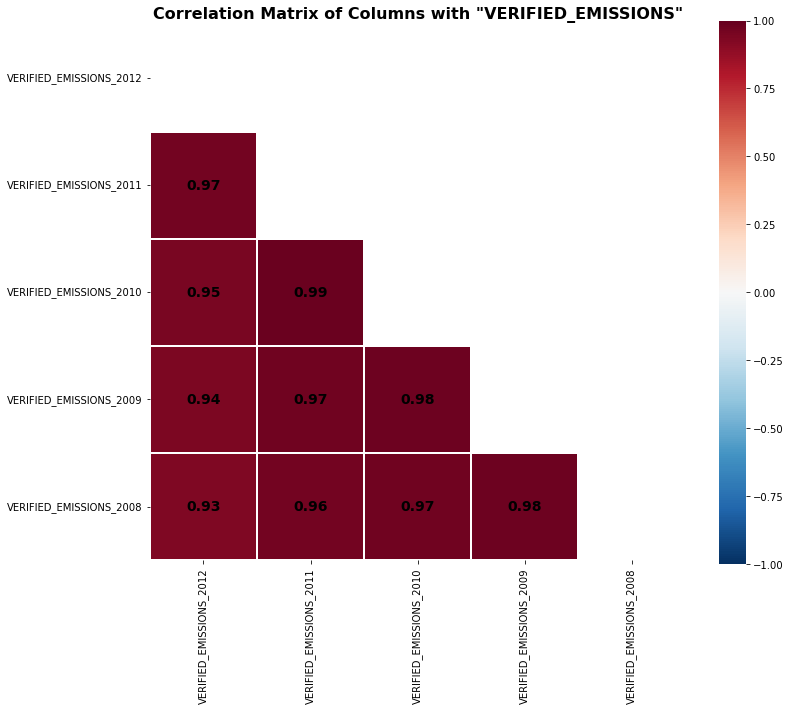

In [87]:
# Filter columns that include 'VERIFIED_EMISSIONS' in their names
columns_of_interest = [col for col in train.columns if 'VERIFIED_EMISSIONS' in col]
train_filtered = train[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = train_filtered.corr().round(3)

# Set up the heatmap
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Customize the heatmap with larger annotation text
sns.heatmap(corr_matrix,
            linewidths=0.1,
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linecolor='white',
            cmap=colormap,
            square=True,
            fmt='.2g',
            annot_kws={"size": 14, "weight": "bold", "color": "black"},  # Adjust font size, weight, and color
            mask=mask)

plt.title('Correlation Matrix of Columns with "VERIFIED_EMISSIONS"', fontsize=16, fontweight='bold')  # Optional title
plt.show()

As you can seen, only data from 2008 till 2012 is displayed as the rest of the data isn't numerical, we'll get to that in the data preparation phase.

<font color='#54555A' size='5'>**Data Preparation** </font>

In [90]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,Excluded,21,-1,-1,-1,-1
1,201836.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,31,-1,-1,-1,-1
2,201564.0,10,Excluded,Excluded,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,Excluded,...,Excluded,Excluded,Excluded,Excluded,Excluded,297,-1,-1,-1,-1


In [94]:
# Replace 'Excluded' with -1 in the entire DataFrame
train.replace('Excluded', -1, inplace=True)

In [95]:
train.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
0,201505.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,21,-1,-1,-1,-1
1,201836.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,31,-1,-1,-1,-1
2,201564.0,10,-1,-1,2074,30,228,0,357,0,...,53,1289,1747,508,5614,6165,-1,-1,-1,-1
3,200108.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1720,1692,1678,-1,-1,-1,-1
4,200180.0,10,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,297,-1,-1,-1,-1


<br><br><font color='#6BA9DA' size='4'>- Focusing on the activity type of our target refinerees</font>

In [111]:
# Filter the dataset where MAIN_ACTIVITY_TYPE_CODE == 21
target_refinerees = train[train['MAIN_ACTIVITY_TYPE_CODE'] == 21]

In [97]:
target_refinerees.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26.0,21,2579589,-1,2255065,-1,2749644,-1,2731772,-1,...,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176.0,21,2182916,-1,1919317,-1,2196298,-1,1905989,-1,...,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209.0,21,10349,-1,15673,-1,39878,-1,43978,-1,...,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127.0,21,3282539,-1,3712276,-1,3788472,-1,3627295,-1,...,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126.0,21,-1,-1,10515,-1,14890,-1,215021,-1,...,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


In [98]:
target_refinerees.shape

(137, 22)

In [99]:
target_refinerees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 151 to 14759
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INSTALLATION_IDENTIFIER     137 non-null    float64
 1   MAIN_ACTIVITY_TYPE_CODE     137 non-null    int64  
 2   VERIFIED_EMISSIONS_2023     137 non-null    object 
 3   CH_VERIFIED_EMISSIONS_2023  137 non-null    object 
 4   VERIFIED_EMISSIONS_2022     137 non-null    object 
 5   CH_VERIFIED_EMISSIONS_2022  137 non-null    object 
 6   VERIFIED_EMISSIONS_2021     137 non-null    object 
 7   CH_VERIFIED_EMISSIONS_2021  137 non-null    object 
 8   VERIFIED_EMISSIONS_2020     137 non-null    object 
 9   CH_VERIFIED_EMISSIONS_2020  137 non-null    object 
 10  VERIFIED_EMISSIONS_2019     137 non-null    object 
 11  VERIFIED_EMISSIONS_2018     137 non-null    object 
 12  VERIFIED_EMISSIONS_2017     137 non-null    object 
 13  VERIFIED_EMISSIONS_2016     137

In [112]:
# Convert all columns to integer type
target_refinerees = target_refinerees.astype(int)

In [101]:
target_refinerees.head()

,INSTALLATION_IDENTIFIER,MAIN_ACTIVITY_TYPE_CODE,VERIFIED_EMISSIONS_2023,CH_VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,CH_VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,CH_VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,CH_VERIFIED_EMISSIONS_2020,...,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26,21,2579589,-1,2255065,-1,2749644,-1,2731772,-1,...,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176,21,2182916,-1,1919317,-1,2196298,-1,1905989,-1,...,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209,21,10349,-1,15673,-1,39878,-1,43978,-1,...,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127,21,3282539,-1,3712276,-1,3788472,-1,3627295,-1,...,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126,21,-1,-1,10515,-1,14890,-1,215021,-1,...,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


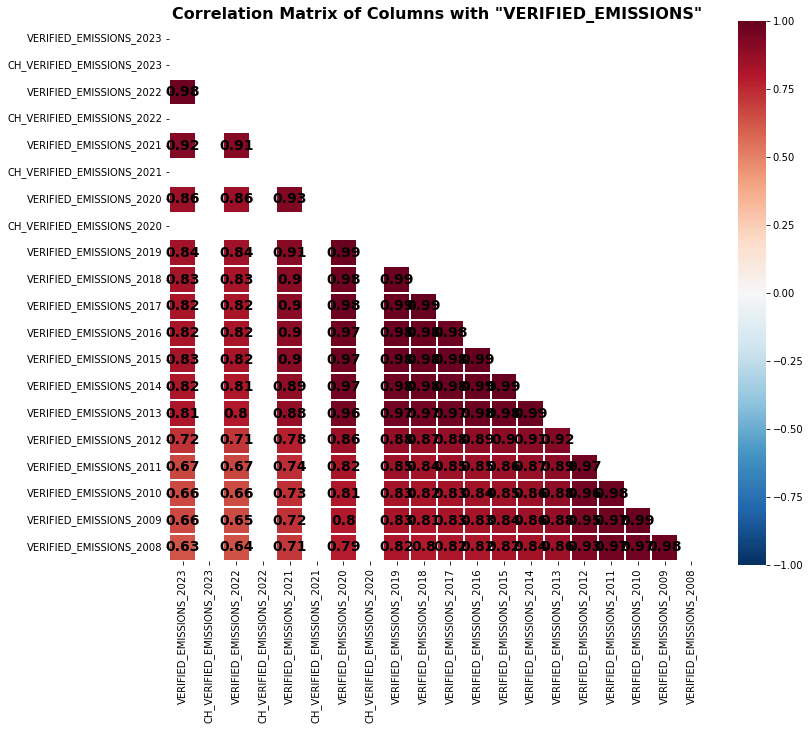

In [102]:
# Filter columns that include 'VERIFIED_EMISSIONS' in their names
columns_of_interest = [col for col in target_refinerees.columns if 'VERIFIED_EMISSIONS' in col]
train_filtered = target_refinerees[columns_of_interest]

# Calculate the correlation matrix
corr_matrix = train_filtered.corr().round(3)

# Set up the heatmap
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Customize the heatmap with larger annotation text
sns.heatmap(corr_matrix,
            linewidths=0.1,
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linecolor='white',
            cmap=colormap,
            square=True,
            fmt='.2g',
            annot_kws={"size": 14, "weight": "bold", "color": "black"},  # Adjust font size, weight, and color
            mask=mask)

plt.title('Correlation Matrix of Columns with "VERIFIED_EMISSIONS"', fontsize=16, fontweight='bold')  # Optional title
plt.show()

==> As we can see, emissions from all years are very correlated to 2023's emissions. However **columns starting with 'CH' are NOT correlated.**

In [113]:
# Identify columns to drop (starting with 'CH')
columns_to_drop = [col for col in target_refinerees.columns if col.startswith('CH')]

# Drop identified columns
target_refinerees.drop(columns=columns_to_drop, inplace=True)

In [114]:
# Drop the column 'MAIN_ACTIVITY_TYPE_CODE'
target_refinerees.drop(columns='MAIN_ACTIVITY_TYPE_CODE', inplace=True)
target_refinerees.head()

,INSTALLATION_IDENTIFIER,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,26,2579589,2255065,2749644,2731772,2791040,2824369,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,176,2182916,1919317,2196298,1905989,2093011,1994945,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,209,10349,15673,39878,43978,46312,46383,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,127,3282539,3712276,3788472,3627295,4004998,3643252,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,126,-1,10515,14890,215021,471834,457012,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


<br><br><font color='#6BA9DA' size='4'>- Handling Missing Values</font>

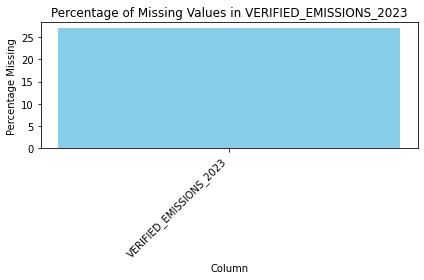

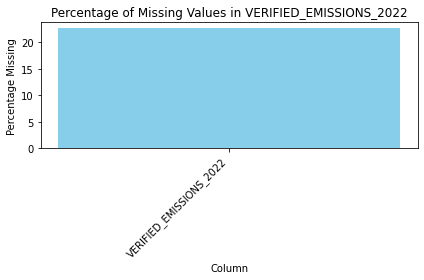

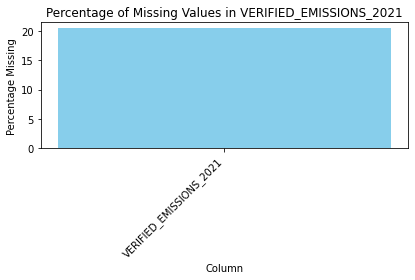

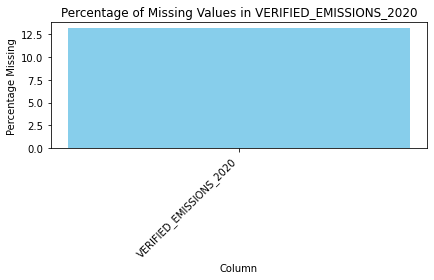

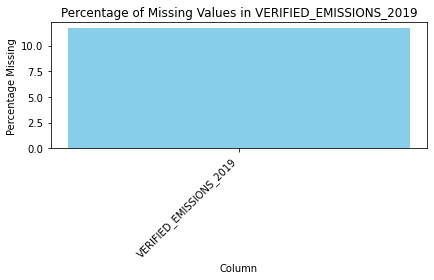

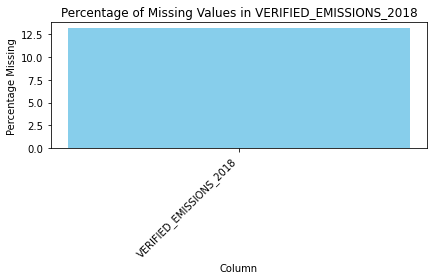

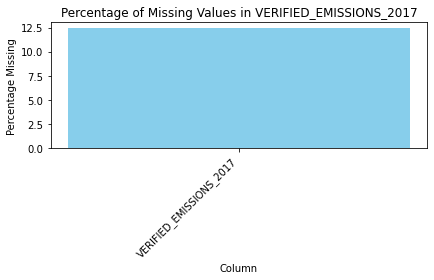

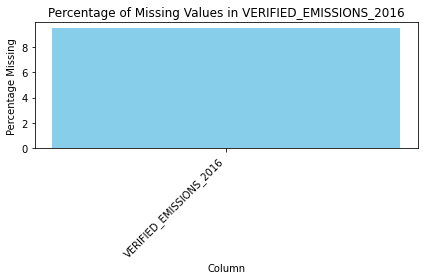

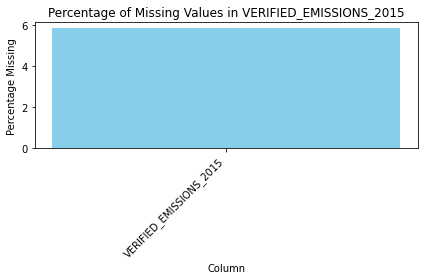

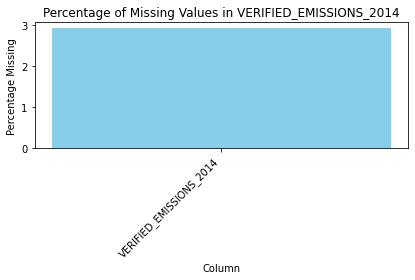

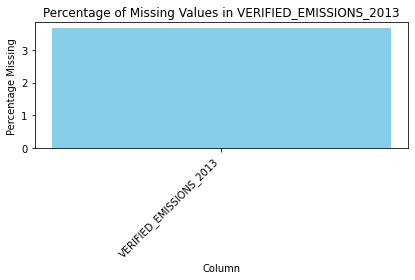

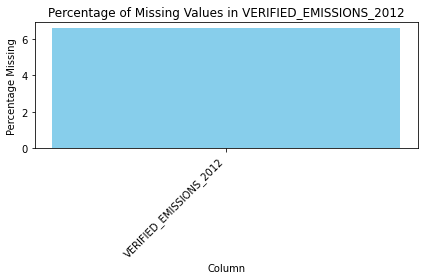

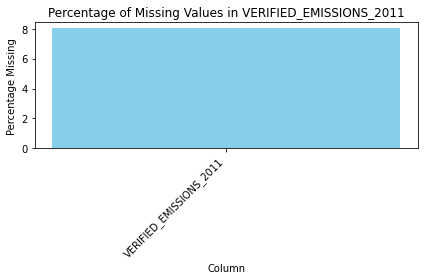

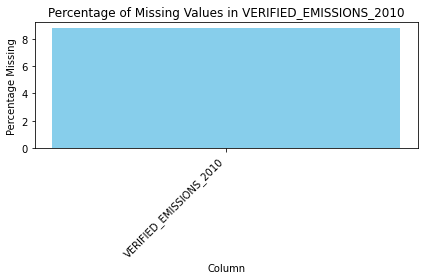

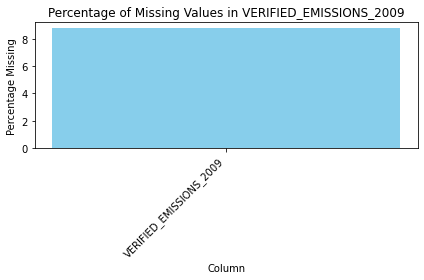

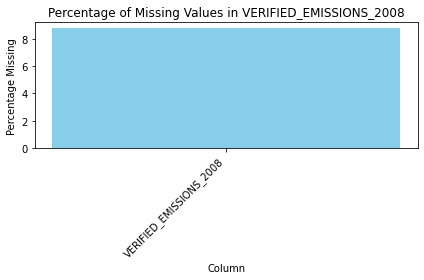

In [119]:
for column in target_refinerees.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (target_refinerees[column] == -1).sum() / len(target_refinerees) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

==> As depicted in the plots above, it is evident that over time, the visibility of CO2 emissions decreases as the number of missing values increases across the years

In [121]:
# Create a new dataset 'targets' excluding the first column
targets = target_refinerees.iloc[:, 1:]

In [127]:
targets.head()

,VERIFIED_EMISSIONS_2023,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2008
151,2579589,2255065,2749644,2731772,2791040,2824369,2738604,2784461,2804050,2713186,2826640,2592526,2530318,2490464,2567934,2565047
444,2182916,1919317,2196298,1905989,2093011,1994945,1883919,1932514,1957465,2017865,1742152,2028106,1937506,1798914,1839391,1666099
542,10349,15673,39878,43978,46312,46383,39697,42796,35415,36192,34018,40141,42578,44310,59719,56029
604,3282539,3712276,3788472,3627295,4004998,3643252,3676934,3719356,3780955,3621037,3645538,3566142,3261352,3985956,3776763,4021016
635,-1,10515,14890,215021,471834,457012,451446,388655,493884,498625,537352,300749,539452,521974,525550,525496


In [130]:
#re organize columns
targets = targets[targets.columns[::-1]]


In [131]:
targets.head()

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186,2804050,2784461,2738604,2824369,2791040,2731772,2749644,2255065,2579589
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865,1957465,1932514,1883919,1994945,2093011,1905989,2196298,1919317,2182916
542,56029,59719,44310,42578,40141,34018,36192,35415,42796,39697,46383,46312,43978,39878,15673,10349
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037,3780955,3719356,3676934,3643252,4004998,3627295,3788472,3712276,3282539
635,525496,525550,521974,539452,300749,537352,498625,493884,388655,451446,457012,471834,215021,14890,10515,-1


In [152]:
#calculate number of lines where there are consecutive -1 values

def find_consecutive_minus1_rows(df):
    rows_with_consecutive_minus1 = []
    for index, row in df.iterrows():
        consecutive_count = 0
        for value in row:
            if (value == -1)| (value == 0):
                consecutive_count += 1
            else:
                break
        if consecutive_count > 0:
            rows_with_consecutive_minus1.append((index, consecutive_count))
    return rows_with_consecutive_minus1

# Find rows with consecutive -1 values and their counts
consecutive_minus1_rows = find_consecutive_minus1_rows(targets)

# Display rows with consecutive -1 values and their counts
print("Rows with consecutive missing values:")
for row_index, consecutive_count in consecutive_minus1_rows:
    print(f"Row {row_index}: {consecutive_count} consecutive -missing values")

# Optionally, you can also create a new DataFrame with these rows:
rows_df = targets.loc[[row_index for row_index, _ in consecutive_minus1_rows]]

# Display the DataFrame with rows containing consecutive -1 values
print("\nDataFrame with rows containing consecutive missing values:")
rows_df

Rows with consecutive missing values:
Row 728: 4 consecutive -missing values
Row 731: 17 consecutive -missing values
Row 2765: 11 consecutive -missing values
Row 2854: 6 consecutive -missing values
Row 3909: 5 consecutive -missing values
Row 3918: 6 consecutive -missing values
Row 3940: 3 consecutive -missing values
Row 5403: 8 consecutive -missing values
Row 6666: 13 consecutive -missing values
Row 7782: 4 consecutive -missing values
Row 9366: 5 consecutive -missing values
Row 9367: 5 consecutive -missing values
Row 11667: 5 consecutive -missing values
Row 13626: 17 consecutive -missing values

DataFrame with rows containing consecutive missing values:


,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
728,-1,-1,-1,-1,1937,2380,3609,4515,3238,3752,1208,0,-1,-1,-1,-1,4
731,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,0
2765,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3048,50586,62235,40603,40750,11
2854,-1,-1,-1,-1,-1,-1,42539,27216,-1,-1,-1,-1,-1,-1,-1,-1,6
3909,-1,-1,-1,-1,-1,467858,593400,732132,651704,814664,837752,841976,797245,788760,905078,975506,5
3918,-1,-1,-1,-1,-1,-1,6764,16050,48825,58794,59297,59368,49536,62861,61497,231542,6
3940,-1,-1,-1,200185,163425,155160,278674,428636,565541,593584,666794,708827,715406,697209,597144,721077,3
5403,-1,-1,-1,-1,-1,-1,-1,-1,79744,260072,263217,141412,191513,149992,158383,239472,8
6666,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,228,900,327,11
7782,-1,-1,-1,-1,52355,77189,59068,53814,1642,-1,-1,-1,-1,-1,-1,-1,4


In [150]:
# Step 1: Exclude rows with -1 values
filtered_rows_df = rows_df.mask((rows_df == -1) | (rows_df == 0))

# Step 2: Calculate percentage difference
def calculate_avg_percent_diff(row):
    diffs = []
    for i in range(len(row) - 1):
        if not np.isnan(row[i]) and not np.isnan(row[i + 1]):
            diff_percent = ((row[i + 1] - row[i]) / row[i]) * 100
            diffs.append(diff_percent)
    if diffs:
        return np.mean(diffs)
    else:
        return np.nan

# Apply function row-wise to calculate average percentage difference
avg_percent_diff = filtered_rows_df.apply(calculate_avg_percent_diff, axis=1)

# Step 3: Compute the overall average of percentage differences
overall_avg_percent_diff = avg_percent_diff.mean()

# Display results
print("Average percentage difference for each row:")
print(avg_percent_diff)
print("\nOverall average percentage difference:", overall_avg_percent_diff)

Average percentage difference for each row:
728        3.233273
2765     289.660848
2854     -36.021063
3909      -1.479770
3918      54.756499
3940       5.409173
5403      18.951459
6666      44.811363
7782     -20.471465
9366     -27.560202
9367     -11.740780
11667     84.939720
dtype: float64

Overall average percentage difference: 33.707421248243534


In [141]:
# Create a new dataset that is the difference between 'data' and 'da'
new = targets.drop(rows_df.index)

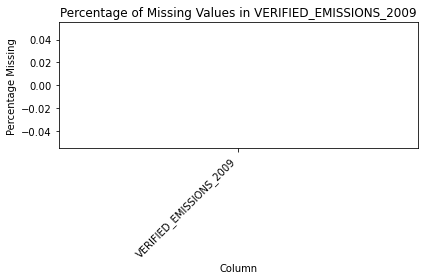

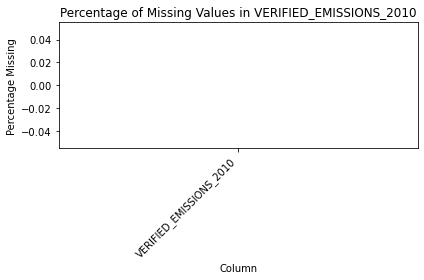

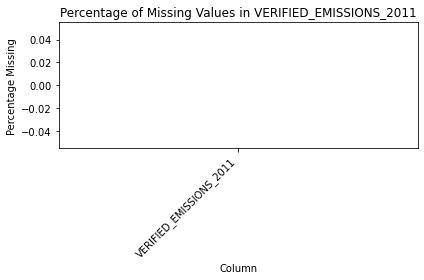

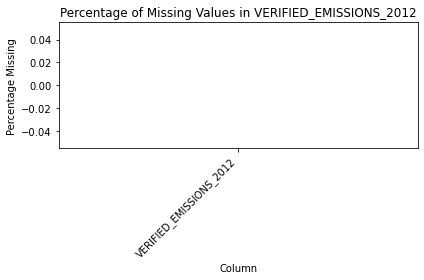

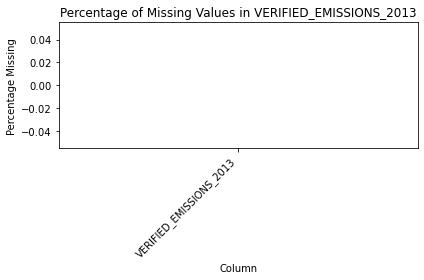

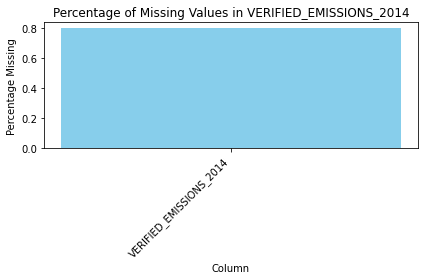

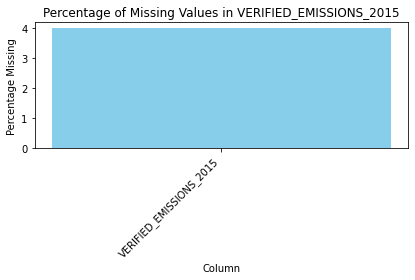

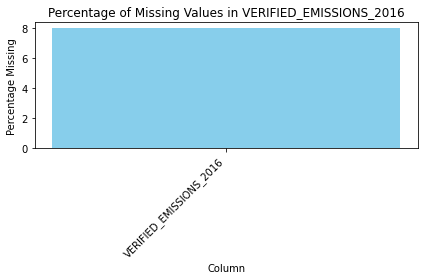

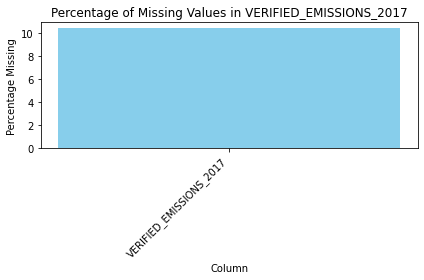

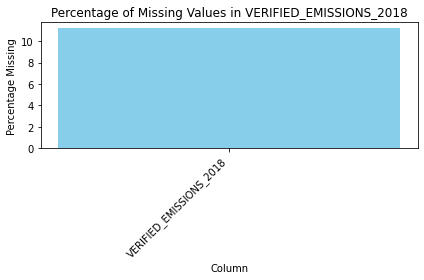

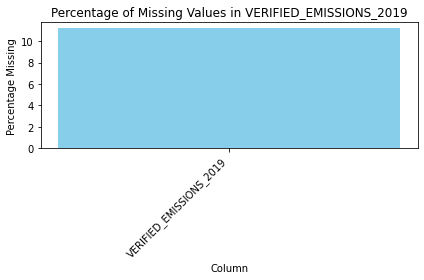

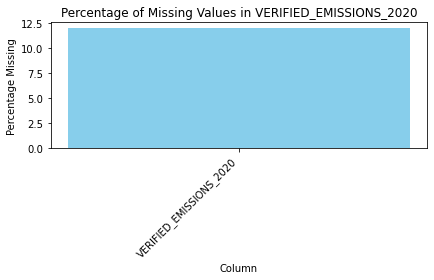

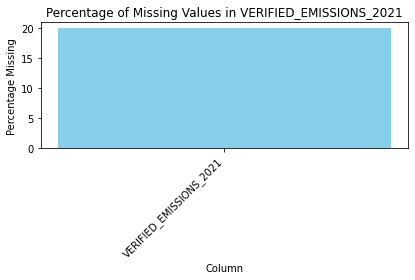

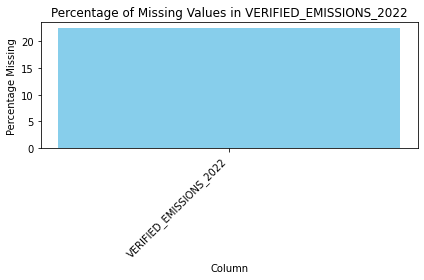

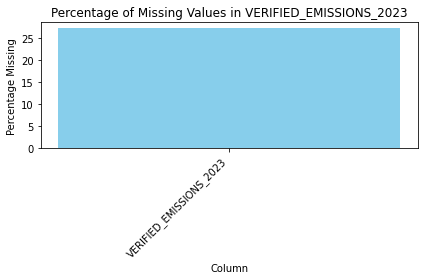

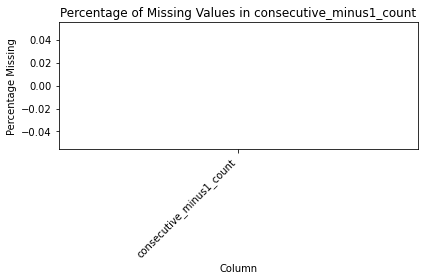

In [142]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == -1).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [144]:
# Iterate through each pair of consecutive columns
for i in range(1, len(new.columns)):
    current_col = targets.columns[i]
    next_col = new.columns[i + 1] if i + 1 < len(new.columns) else None
    
    if next_col is not None:
        # Identify rows where current_col has missing values (-1)
        missing_indices = new[current_col] == -1
        
        # Impute missing values (-1) in current_col with values from next_col
        new.loc[missing_indices, current_col] = new.loc[missing_indices, next_col]

# Replace remaining -1 values with NaN if needed (optional)
new.replace(-1, np.nan, inplace=True)

# Display the updated dataset
new

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
151,2565047,2567934,2490464,2530318,2592526,2826640,2713186.0,2804050.0,2784461.0,2738604.0,2824369.0,2791040.0,2731772.0,2749644.0,2255065.0,2579589,0
444,1666099,1839391,1798914,1937506,2028106,1742152,2017865.0,1957465.0,1932514.0,1883919.0,1994945.0,2093011.0,1905989.0,2196298.0,1919317.0,2182916,0
542,56029,59719,44310,42578,40141,34018,36192.0,35415.0,42796.0,39697.0,46383.0,46312.0,43978.0,39878.0,15673.0,10349,0
604,4021016,3776763,3985956,3261352,3566142,3645538,3621037.0,3780955.0,3719356.0,3676934.0,3643252.0,4004998.0,3627295.0,3788472.0,3712276.0,3282539,0
635,525496,525550,521974,539452,300749,537352,498625.0,493884.0,388655.0,451446.0,457012.0,471834.0,215021.0,14890.0,10515.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14164,157962,141734,159454,124254,122393,133652,137441.0,127611.0,141499.0,147379.0,145135.0,116474.0,106649.0,117388.0,112477.0,100999,0
14326,539306,496876,557207,473110,515636,510343,491235.0,532820.0,503504.0,461299.0,536000.0,570427.0,511723.0,526277.0,587105.0,479781,0
14327,1769903,1777932,1672852,1735310,1823198,1457376,1639901.0,1709050.0,1576765.0,1698054.0,1768630.0,1220342.0,1186464.0,1594959.0,1383877.0,1567625,0
14423,522275,492838,537926,485835,533969,470446,489173.0,465990.0,535225.0,522459.0,547101.0,456632.0,500033.0,506027.0,568991.0,477527,0


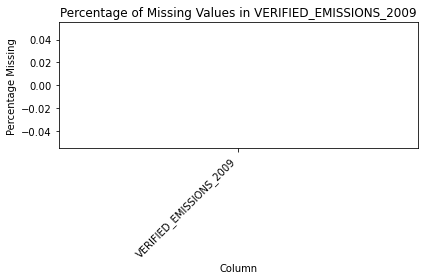

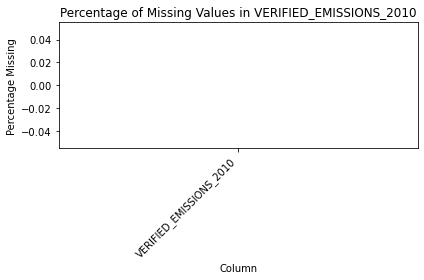

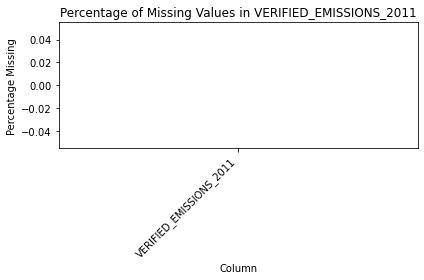

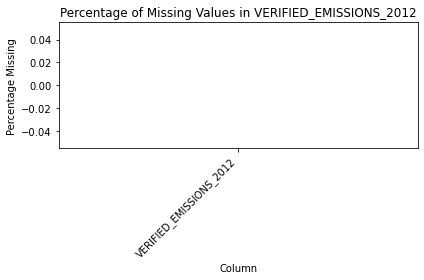

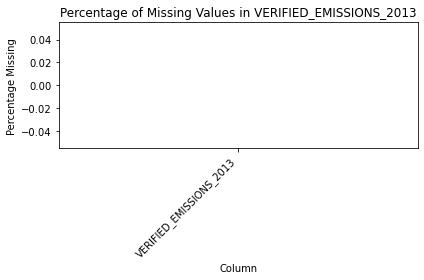

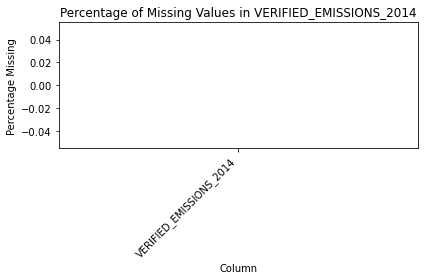

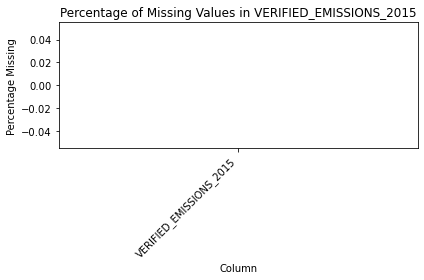

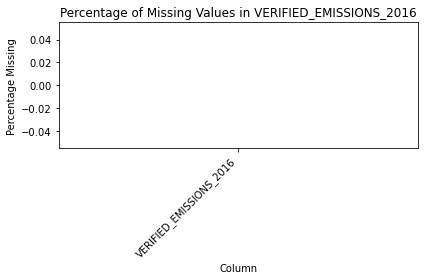

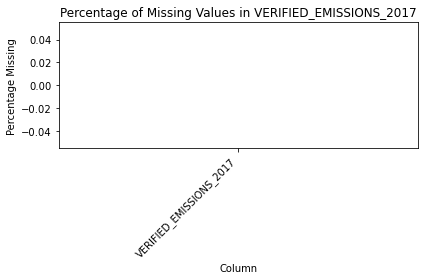

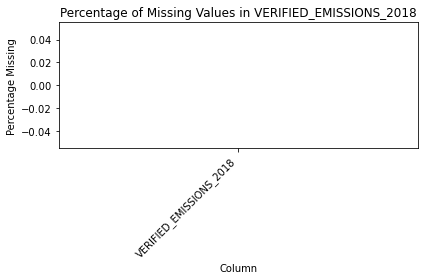

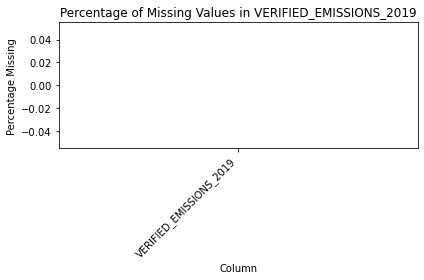

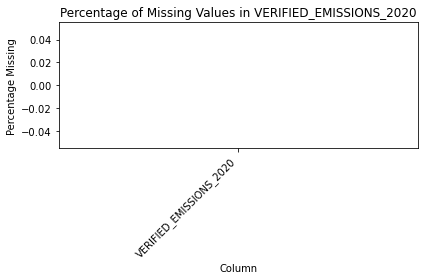

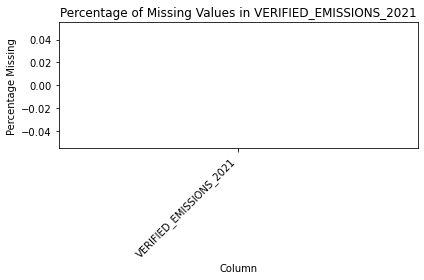

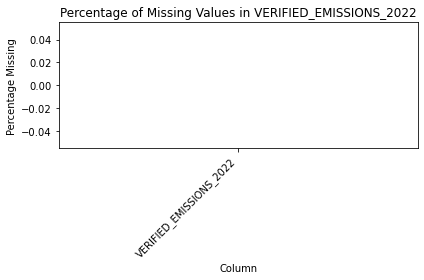

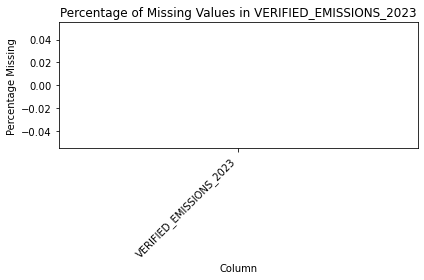

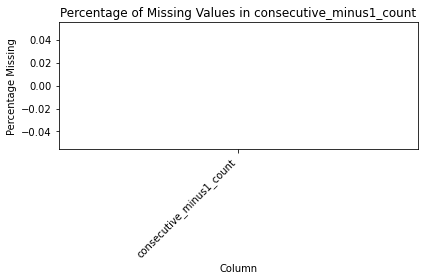

In [145]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == -1).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

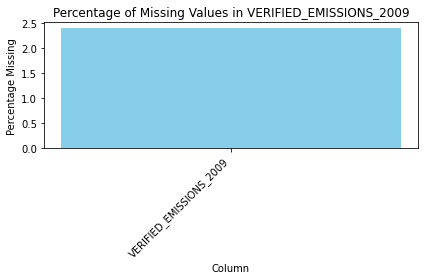

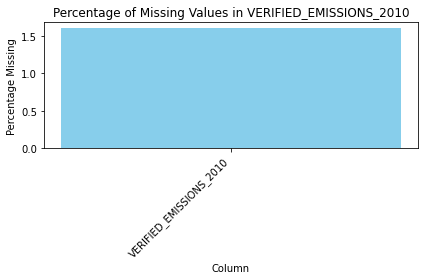

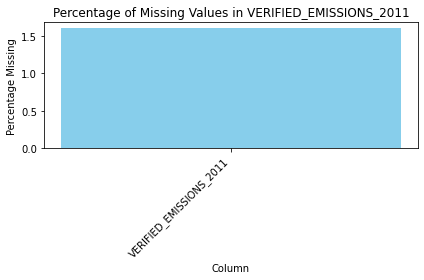

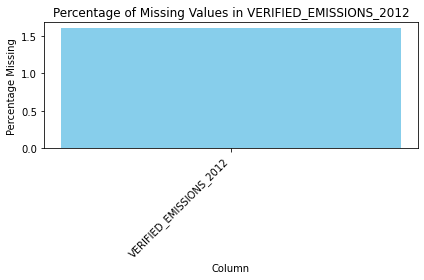

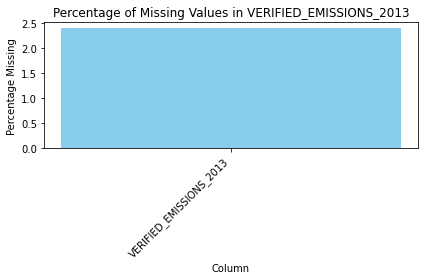

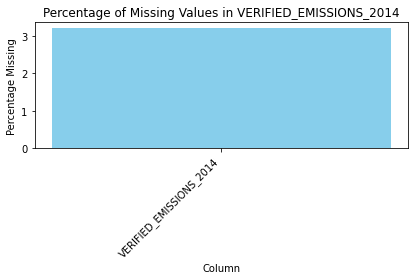

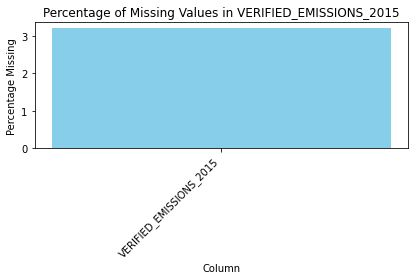

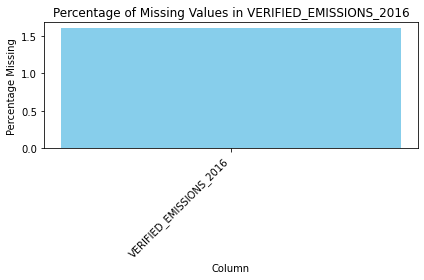

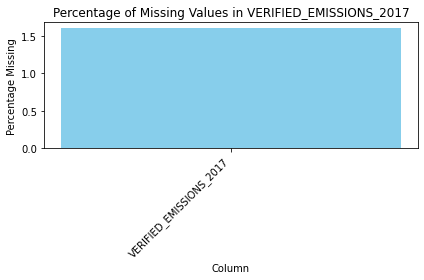

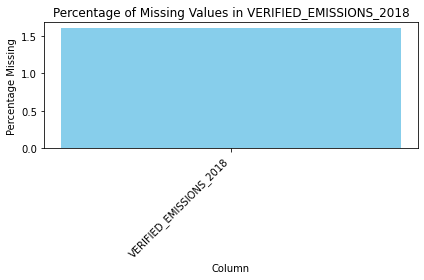

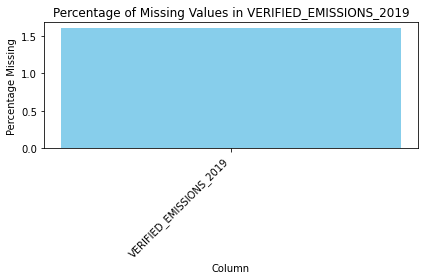

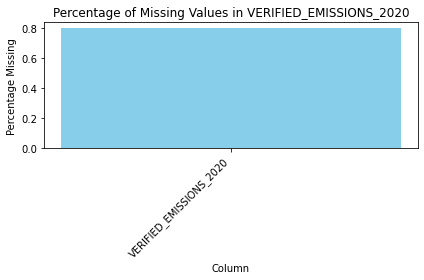

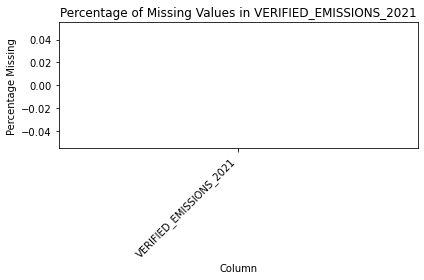

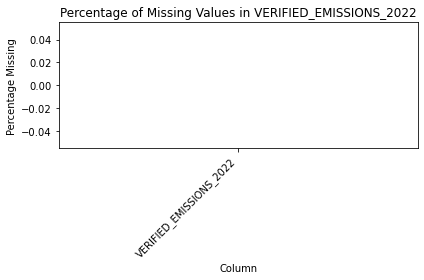

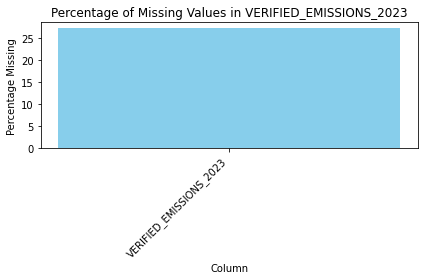

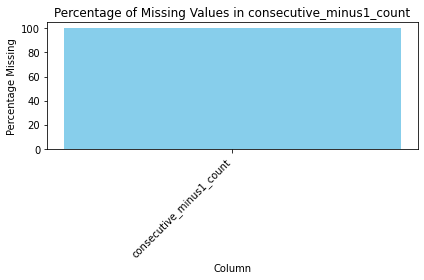

In [147]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == 0).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [148]:
# Iterate through each pair of consecutive columns
for i in range(1, len(new.columns)):
    current_col = targets.columns[i]
    next_col = new.columns[i + 1] if i + 1 < len(new.columns) else None
    
    if next_col is not None:
        # Identify rows where current_col has missing values (0)
        missing_indices = new[current_col] == 0
        
        # Impute missing values (-1) in current_col with values from next_col
        new.loc[missing_indices, current_col] = new.loc[missing_indices, next_col]

# Replace remaining -1 values with NaN if needed (optional)
new.replace(0, np.nan, inplace=True)

# Display the updated dataset
new

,VERIFIED_EMISSIONS_2008,VERIFIED_EMISSIONS_2009,VERIFIED_EMISSIONS_2010,VERIFIED_EMISSIONS_2011,VERIFIED_EMISSIONS_2012,VERIFIED_EMISSIONS_2013,VERIFIED_EMISSIONS_2014,VERIFIED_EMISSIONS_2015,VERIFIED_EMISSIONS_2016,VERIFIED_EMISSIONS_2017,VERIFIED_EMISSIONS_2018,VERIFIED_EMISSIONS_2019,VERIFIED_EMISSIONS_2020,VERIFIED_EMISSIONS_2021,VERIFIED_EMISSIONS_2022,VERIFIED_EMISSIONS_2023,consecutive_minus1_count
151,2565047.0,2567934.0,2490464.0,2530318.0,2592526.0,2826640.0,2713186.0,2804050.0,2784461.0,2738604.0,2824369.0,2791040.0,2731772.0,2749644.0,2255065.0,2579589.0,NaN
444,1666099.0,1839391.0,1798914.0,1937506.0,2028106.0,1742152.0,2017865.0,1957465.0,1932514.0,1883919.0,1994945.0,2093011.0,1905989.0,2196298.0,1919317.0,2182916.0,NaN
542,56029.0,59719.0,44310.0,42578.0,40141.0,34018.0,36192.0,35415.0,42796.0,39697.0,46383.0,46312.0,43978.0,39878.0,15673.0,10349.0,NaN
604,4021016.0,3776763.0,3985956.0,3261352.0,3566142.0,3645538.0,3621037.0,3780955.0,3719356.0,3676934.0,3643252.0,4004998.0,3627295.0,3788472.0,3712276.0,3282539.0,NaN
635,525496.0,525550.0,521974.0,539452.0,300749.0,537352.0,498625.0,493884.0,388655.0,451446.0,457012.0,471834.0,215021.0,14890.0,10515.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14164,157962.0,141734.0,159454.0,124254.0,122393.0,133652.0,137441.0,127611.0,141499.0,147379.0,145135.0,116474.0,106649.0,117388.0,112477.0,100999.0,NaN
14326,539306.0,496876.0,557207.0,473110.0,515636.0,510343.0,491235.0,532820.0,503504.0,461299.0,536000.0,570427.0,511723.0,526277.0,587105.0,479781.0,NaN
14327,1769903.0,1777932.0,1672852.0,1735310.0,1823198.0,1457376.0,1639901.0,1709050.0,1576765.0,1698054.0,1768630.0,1220342.0,1186464.0,1594959.0,1383877.0,1567625.0,NaN
14423,522275.0,492838.0,537926.0,485835.0,533969.0,470446.0,489173.0,465990.0,535225.0,522459.0,547101.0,456632.0,500033.0,506027.0,568991.0,477527.0,NaN


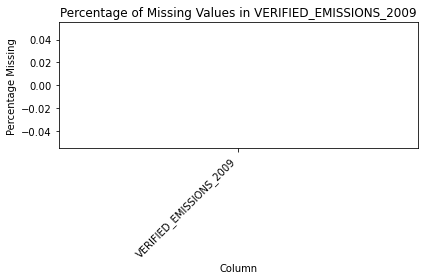

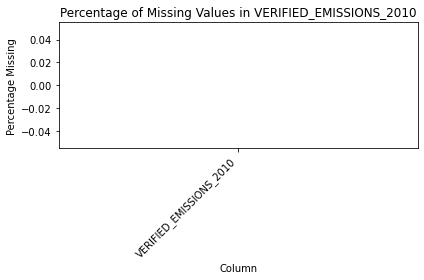

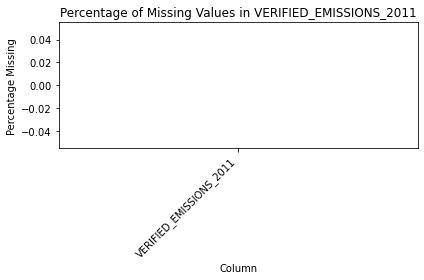

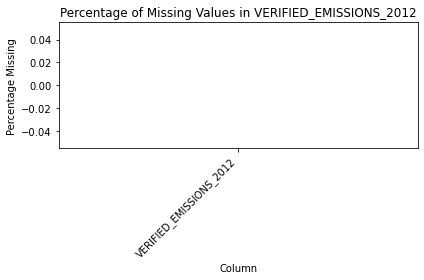

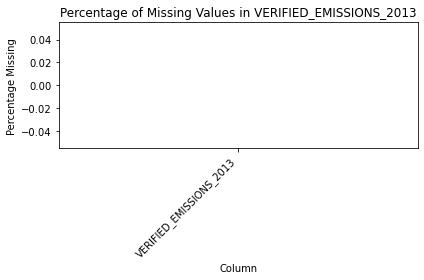

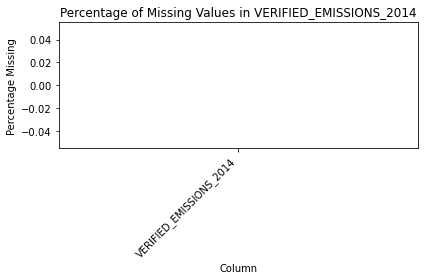

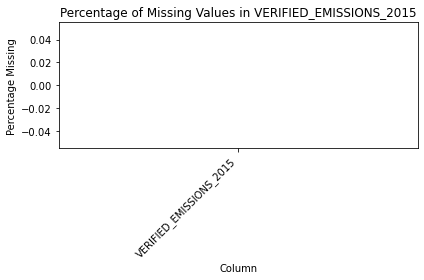

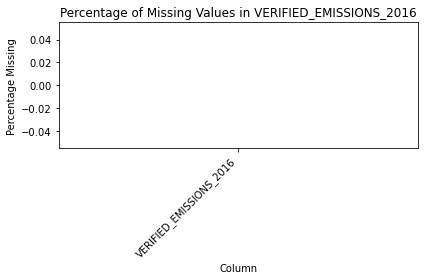

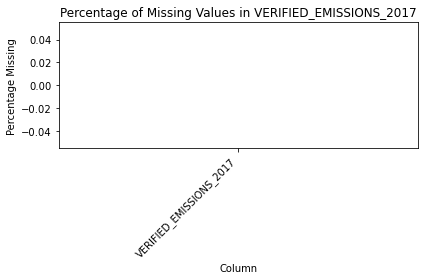

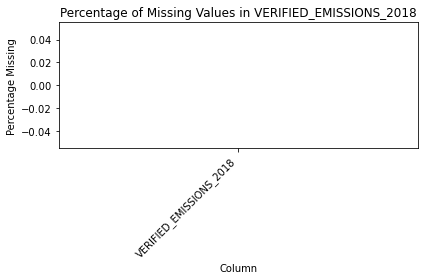

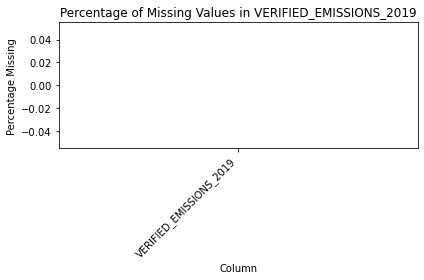

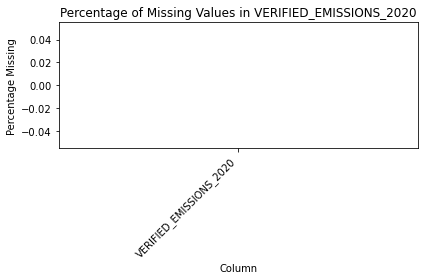

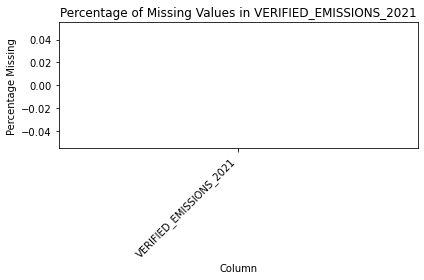

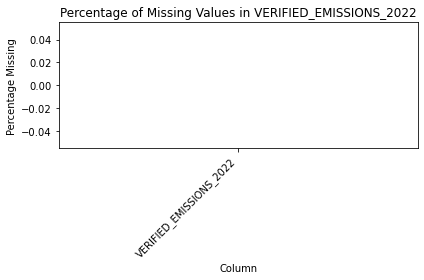

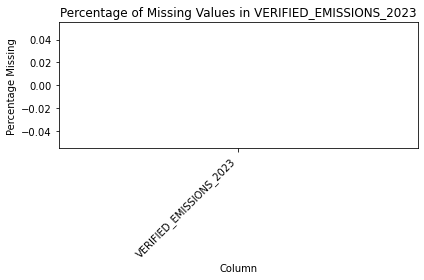

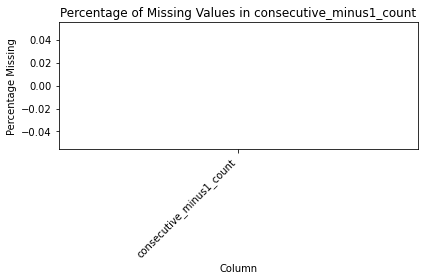

In [149]:
for column in new.columns[1:]:
    # Calculate the percentage of missing values for the current column
    missing_percentage = (new[column] == 0).sum() / len(new) * 100
    
    # Plot the percentage of missing values for the current column
    plt.figure(figsize=(6, 4))
    plt.bar(column, missing_percentage, color='skyblue')
    plt.title(f'Percentage of Missing Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()